# Machine Learning Online Class - Exercise 2: Logistic Regression

## Instructions
In this exercise, you will implement logistic regression and apply it to two
different datasets. Before starting on the programming exercise, we strongly
recommend watching the video lectures and completing the review questions
for the associated topics.
To get started with the exercise, you will need to download the starter
code and unzip its contents to the directory where you wish to complete the
exercise. If needed, use the cd command in Octave/MATLAB to change to
this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “En-
vironment Setup Instructions” of the course website.

```
Files included in this exercise
    ex2.m - Octave/MATLAB script that steps you through the exercise
    ex2 reg.m - Octave/MATLAB script for the later parts of the exercise
    ex2data1.txt - Training set for the first half of the exercise
    ex2data2.txt - Training set for the second half of the exercise
    submit.m - Submission script that sends your solutions to our servers
    mapFeature.m - Function to generate polynomial features
    plotDecisionBoundary.m - Function to plot classifier’s decision bound-
    ary
    [*] plotData.m - Function to plot 2D classification data
    [?] sigmoid.m - Sigmoid Function
    [?] costFunction.m - Logistic Regression Cost Function
    [?] predict.m - Logistic Regression Prediction Function
    [?] costFunctionReg.m - Regularized Logistic Regression Cost
    ? indicates files you will need to complete
```

## Matlab code:
```
%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=",")
X = data[:, :2] # input
y = data[:, 2] # output

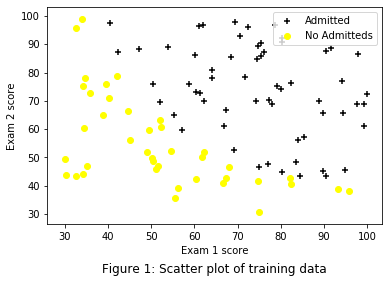

In [3]:
import pandas as pd
data = pd.read_csv('ex2data1.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
mask = y == 1
one= plt.scatter(X[mask][0].values, X[mask][1].values, c='black',marker="+")
zero = plt.scatter(X[~mask][0].values, X[~mask][1].values, c='yellow')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend((one, zero), ('Admitted', 'No Admitteds'), loc = "upper right" )
plt.title('Figure 1: Scatter plot of training data', y=-0.25)
plt.show()

## ============ Part 2: Compute Cost and Gradient ============
```
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

fprintf('\nProgram paused. Press enter to continue.\n');
pause;
```

In [4]:
from sigmoid import sigmoid
from costFunction import costFunction

In [5]:
# load data
data = np.loadtxt('ex2data1.txt', delimiter=",")
X = data[:, :2] # input 100x2
y = data[:, 2] # output (100,)
y = y.reshape(-1, 1) # 100x1
#  Add intercept term to x and X_test
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) # 100x3

#Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1)) # 3x1


cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): ', cost[0,0])
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
for _grad in grad:
    print(_grad[0])
print('Expected gradients (approx):\n-0.1000\n-12.0092\n-11.2628')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2]) # (3,)
test_theta = test_theta.reshape(-1,1) #(3, 1)
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: ', cost[0,0])
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
for _grad in grad:
    print(_grad[0])
print('Expected gradients (approx):\n0.043\n2.566\n2.647\n')

Cost at initial theta (zeros):  0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
-0.1
-12.009216589291153
-11.262842205513593
Expected gradients (approx):
-0.1000
-12.0092
-11.2628
Cost at test theta:  0.2183301938265978
Expected cost (approx): 0.218
Gradient at test theta: 
0.04290299489953446
2.5662341155107558
2.6467973710824326
Expected gradients (approx):
0.043
2.566
2.647



## ============= Part 3: Optimizing using fminunc  =============
```
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');
```

In [11]:
def costFunction(theta, *args):
    """Compute cost and gradient for logistic regression """
    (X, y) = args
    m = len(y)
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    X = X.reshape(100,3)
    z = X.dot(theta)
    h_z = sigmoid(z)
    J = (-1/m) *(y.T.dot(np.log(h_z)) + (1-y).T.dot(np.log(1- h_z))) # cost
    return J

In [12]:
def grad_costFunction(theta, *args):
    """Compute cost and gradient for logistic regression """
#     (X, y) = a
    (X, y) = args
    m = len(y)
    X = X.reshape(100,3)
    y = y.reshape(-1,1)
    theta = theta.reshape(-1,1)
    X = X.reshape(100,3)
    z = X.dot(theta) #100x1
    h_z = sigmoid(z)
    grad = (1/m)* X.T.dot(h_z - y) # gradient
    return grad.ravel()

In [13]:
from scipy.optimize import fmin_bfgs
result_optimize = fmin_bfgs(f=costFunction, 
                            fprime=grad_costFunction,
                            x0=initial_theta.ravel(), 
                            args=(X.ravel(), y.ravel(), ),
                            maxiter=400, 
                            full_output=1, 
                            disp=1)    

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


/home/duc/Workspace/training-duc-machine-learning-andrew-ng/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [24]:
theta = result_optimize[0].reshape(-1,1)
cost = result_optimize[1]
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('Theta found by fminunc:')
for _theta in theta:
    print(_theta[0])
print('Expected theta (approx): ')
print('-25.161\n0.206\n0.201\n')

Cost at theta found by fminunc: 0.20349770158944375
Expected cost (approx): 0.203
Theta found by fminunc:
-25.161332838910422
0.20623169711535463
0.20147160270028497
Expected theta (approx): 
-25.161
0.206
0.201



## ============== Part 4: Predict and Accuracies ==============
```
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');
```

In [25]:
from predict import predict 

In [28]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
pred = predict(theta, X)

print('Train Accuracy: ', np.mean(pred == y.flatten()) * 100)
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85, we predict an admission probability of [0.77629072]
Expected value: 0.775 +/- 0.002

Train Accuracy:  89.0
Expected accuracy (approx): 89.0
